In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


In [ ]:
df=pd.read_csv("cancer_classification.csv")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
x=df.iloc[:,:-1].values
y= df.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=1)

In [ ]:
ann=Sequential()
ann.add(Dense(units=30,activation="relu"))
ann.add(Dense(units=15,activation="relu"))
ann.add(Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy")
ann.fit(xtrain,ytrain,epochs=600,validation_data=(xtest,ytest))


Epoch 1/600
15/15 [==============================] - 1s 14ms/step - loss: 0.5903 - val_loss: 0.5032
Epoch 2/600
15/15 [==============================] - 0s 3ms/step - loss: 0.3724 - val_loss: 0.3641
Epoch 3/600
15/15 [==============================] - 0s 3ms/step - loss: 0.2661 - val_loss: 0.2844
Epoch 4/600
15/15 [==============================] - 0s 3ms/step - loss: 0.2024 - val_loss: 0.2340
Epoch 5/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1634 - val_loss: 0.2014
Epoch 6/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1374 - val_loss: 0.1733
Epoch 7/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1186 - val_loss: 0.1532
Epoch 8/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1042 - val_loss: 0.1377
Epoch 9/600
15/15 [==============================] - 0s 4ms/step - loss: 0.0926 - val_loss: 0.1232
Epoch 10/600
15/15 [==============================] - 0s 3ms/step - loss: 0.0838 - val_loss: 0.1130
Epoch 11

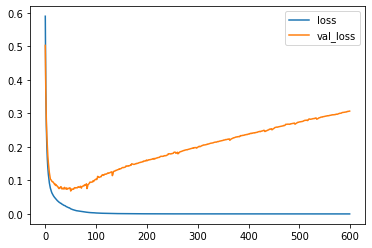

In [ ]:
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()

In [ ]:
ann=Sequential()
ann.add(Dense(units=30,activation="relu"))
ann.add(Dense(units=15,activation="relu"))
ann.add(Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy")

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
earlystop=EarlyStopping(monitor ='val_loss',mode="min",verbose=1,patience=25)

In [ ]:
ann.fit(xtrain,ytrain,epochs=600,validation_data=(xtest,ytest),callbacks=[earlystop])


Epoch 1/600
15/15 [==============================] - 1s 11ms/step - loss: 0.8782 - val_loss: 0.6330
Epoch 2/600
15/15 [==============================] - 0s 3ms/step - loss: 0.4930 - val_loss: 0.4320
Epoch 3/600
15/15 [==============================] - 0s 3ms/step - loss: 0.3280 - val_loss: 0.3273
Epoch 4/600
15/15 [==============================] - 0s 3ms/step - loss: 0.2432 - val_loss: 0.2659
Epoch 5/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1938 - val_loss: 0.2274
Epoch 6/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1643 - val_loss: 0.2002
Epoch 7/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1434 - val_loss: 0.1820
Epoch 8/600
15/15 [==============================] - 0s 4ms/step - loss: 0.1289 - val_loss: 0.1664
Epoch 9/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1175 - val_loss: 0.1547
Epoch 10/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1089 - val_loss: 0.1474
Epoch 11

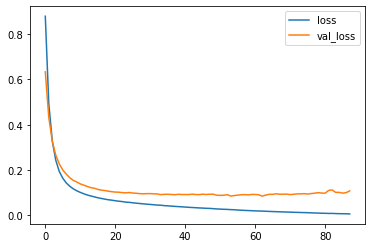

In [ ]:
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
ann=Sequential()

ann.add(Dense(units=30,activation="relu"))
ann.add(Dropout(rate=0.5))
ann.add(Dense(units=15,activation="relu"))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=1,activation="sigmoid"))

ann.compile(optimizer="adam",loss="binary_crossentropy")

In [ ]:
ann.fit(xtrain,ytrain,epochs=600,validation_data=(xtest,ytest),callbacks=[earlystop])


Epoch 1/600
15/15 [==============================] - 1s 30ms/step - loss: 0.9895 - val_loss: 0.6741
Epoch 2/600
15/15 [==============================] - 0s 9ms/step - loss: 0.7465 - val_loss: 0.5781
Epoch 3/600
15/15 [==============================] - 0s 10ms/step - loss: 0.6375 - val_loss: 0.5144
Epoch 4/600
15/15 [==============================] - 0s 10ms/step - loss: 0.5454 - val_loss: 0.4674
Epoch 5/600
15/15 [==============================] - 0s 10ms/step - loss: 0.5107 - val_loss: 0.4236
Epoch 6/600
15/15 [==============================] - 0s 9ms/step - loss: 0.4790 - val_loss: 0.3772
Epoch 7/600
15/15 [==============================] - 0s 8ms/step - loss: 0.4171 - val_loss: 0.3320
Epoch 8/600
15/15 [==============================] - 0s 9ms/step - loss: 0.3875 - val_loss: 0.2898
Epoch 9/600
15/15 [==============================] - 0s 9ms/step - loss: 0.3312 - val_loss: 0.2527
Epoch 10/600
15/15 [==============================] - 0s 12ms/step - loss: 0.2989 - val_loss: 0.2196
Epoc

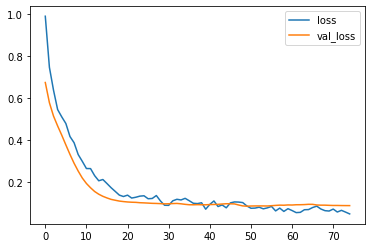

In [ ]:
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()

In [ ]:
ypred = ann.predict(xtest)

In [ ]:
ypred=ypred>0.5

In [ ]:
 from sklearn.metrics import classification_report
 print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

